Comparing different values for surface mixing parameters. 

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [2]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [3]:
oct19hindcast = nc.Dataset('/results/SalishSea/hindcast/19oct14/SalishSea_1h_20141019_20141019_grid_T.nc')
oct28hindcast = nc.Dataset('/results/SalishSea/hindcast/28oct14/SalishSea_1h_20141028_20141028_grid_T.nc')
oct19test1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/surface_wave_mixing/SalishSea_1h_20141019_20141028_grid_T_20141019-20141019.nc')
oct28test1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/surface_wave_mixing/SalishSea_1h_20141019_20141028_grid_T_20141028-20141028.nc')
oct28test2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/surface_mixing1/SalishSea_1h_20141019_20141028_grid_T_20141028-20141028.nc')

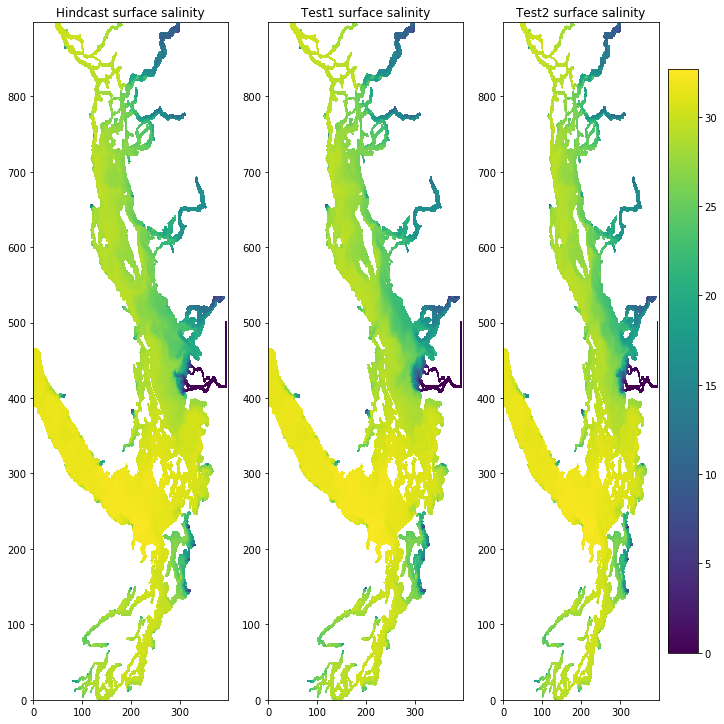

In [87]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['vosaline'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]))
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['vosaline'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]))
fig.tight_layout()
sal2 = ax[2].pcolormesh(ma.masked_array(oct28test2.variables['vosaline'][23,0,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,0,...]))
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast surface salinity')
ax[1].set_title('Test1 surface salinity')
ax[2].set_title('Test2 surface salinity')

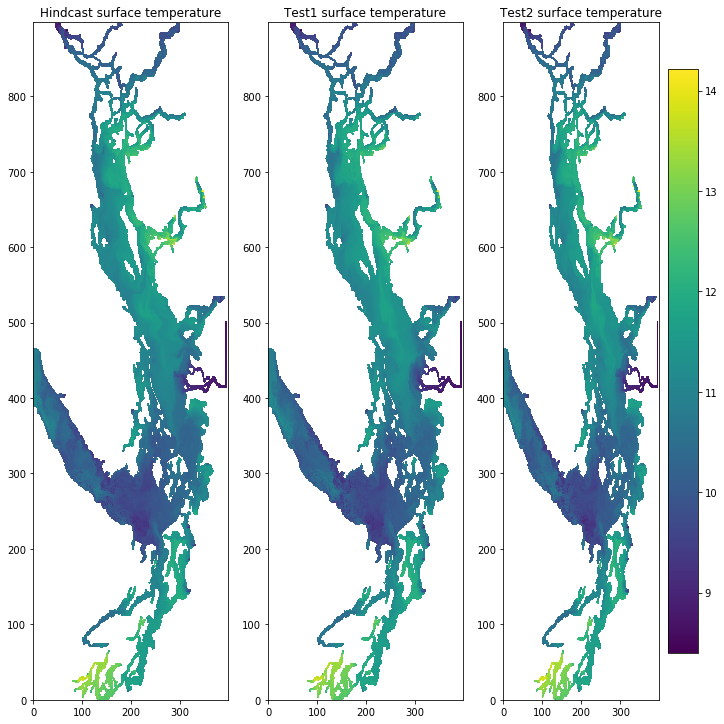

In [89]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['votemper'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]))
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['votemper'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]))
fig.tight_layout()
sal2 = ax[2].pcolormesh(ma.masked_array(oct28test2.variables['votemper'][23,0,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,0,...]))
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast surface temperature')
ax[1].set_title('Test1 surface temperature')
ax[2].set_title('Test2 surface temperature')

In [4]:
uhindcast = nc.Dataset('/results/SalishSea/hindcast/28oct14/SalishSea_1h_20141028_20141028_grid_U.nc')
utest1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/surface_wave_mixing/SalishSea_1h_20141019_20141028_grid_U_20141028-20141028.nc')
utest2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/surface_mixing1/SalishSea_1h_20141019_20141028_grid_U_20141028-20141028.nc')

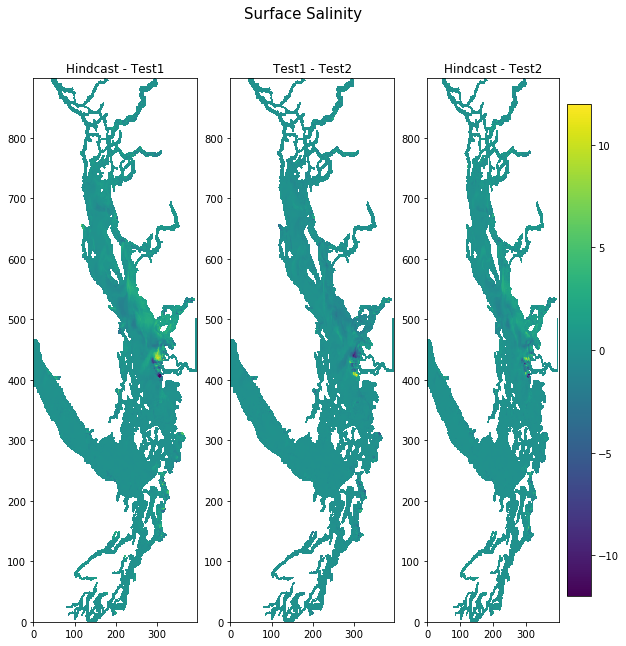

In [91]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['vosaline'][23,0,...]
                                        - oct28test1.variables['vosaline'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-12,vmax=12)
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['vosaline'][23,0,...]
                                        -oct28test2.variables['vosaline'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-12,vmax=12)
sal2 = ax[2].pcolormesh(ma.masked_array(-oct28test2.variables['vosaline'][23,0,...]
                                        +oct28hindcast.variables['vosaline'][23,0,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-12,vmax=12)
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('Surface Salinity', fontsize=(15))

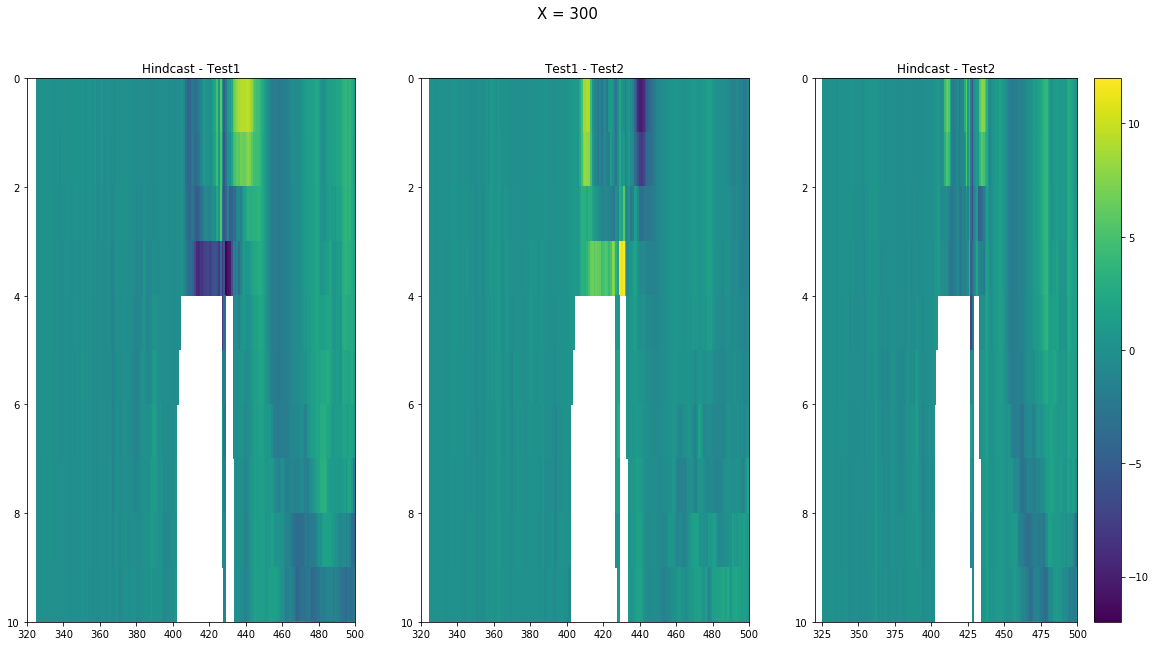

In [101]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['vosaline'][23,:,:,300]
                                        - oct28test1.variables['vosaline'][23,:,:,300],
                                mask = 1-mesh_mask.variables['tmask'][0,:,:,300]),
                     vmin=-12,vmax=12)
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['vosaline'][23,:,:,300]
                                        -oct28test2.variables['vosaline'][23,:,:,300],
                                mask = 1-mesh_mask.variables['tmask'][0,:,:,300]),
                     vmin=-12,vmax=12)
sal2 = ax[2].pcolormesh(ma.masked_array(-oct28test2.variables['vosaline'][23,:,:,300]
                                        +oct28hindcast.variables['vosaline'][23,:,:,300],
                                       mask = 1-mesh_mask.variables['tmask'][0,:,:,300]),
                     vmin=-12,vmax=12)
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('X = 300', fontsize=(15))
for ax in ax:
    ax.set_ylim(10,0)
    ax.set_xlim(320,500)

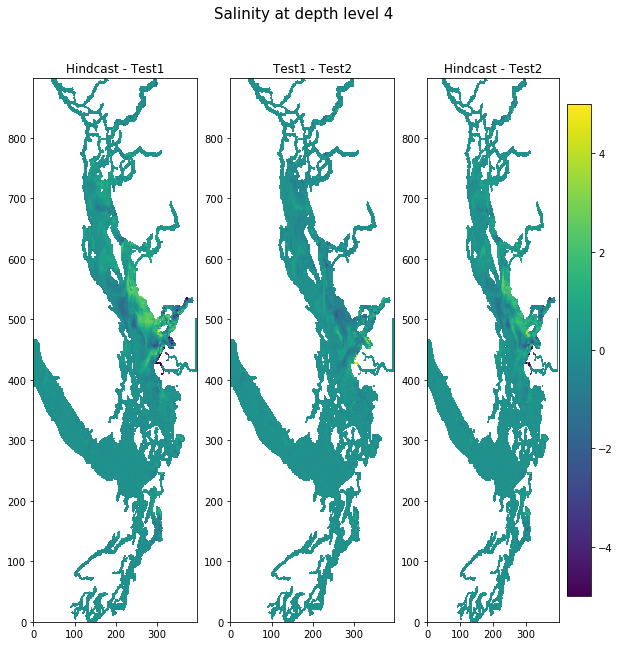

In [93]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['vosaline'][23,4,...]
                                        - oct28test1.variables['vosaline'][23,4,...],
                                mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-5,vmax=5)
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['vosaline'][23,4,...]
                                        -oct28test2.variables['vosaline'][23,4,...],
                                mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-5,vmax=5)
sal2 = ax[2].pcolormesh(ma.masked_array(-oct28test2.variables['vosaline'][23,4,...]
                                        +oct28hindcast.variables['vosaline'][23,4,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-5,vmax=5)
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('Salinity at depth level 4', fontsize=15)

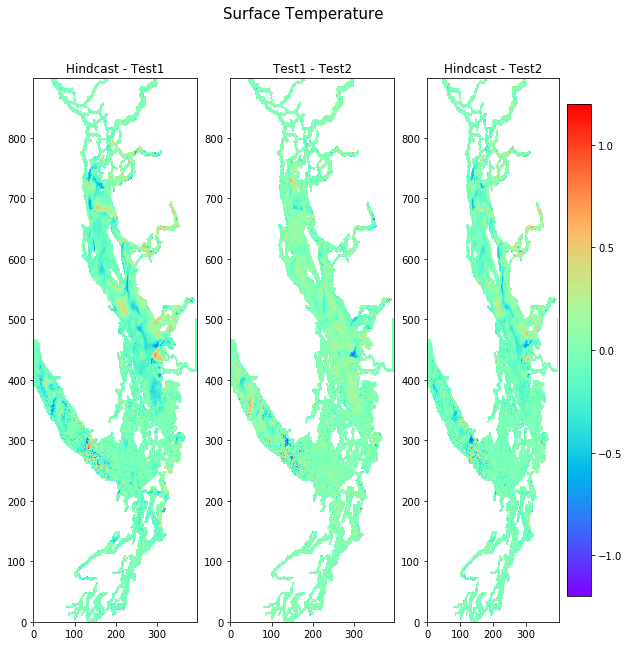

In [94]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['votemper'][23,0,...]
                                        - oct28test1.variables['votemper'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-1.2, vmax=1.2, cmap = 'rainbow')
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['votemper'][23,0,...]
                                        -oct28test2.variables['votemper'][23,0,...],
                                mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-1.2,vmax= 1.2, cmap = 'rainbow')
sal2 = ax[2].pcolormesh(ma.masked_array(-oct28test2.variables['votemper'][23,0,...]
                                        +oct28hindcast.variables['votemper'][23,0,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,0,...]),
                     vmin=-1.2, vmax=1.2, cmap = 'rainbow')
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('Surface Temperature', fontsize=15)

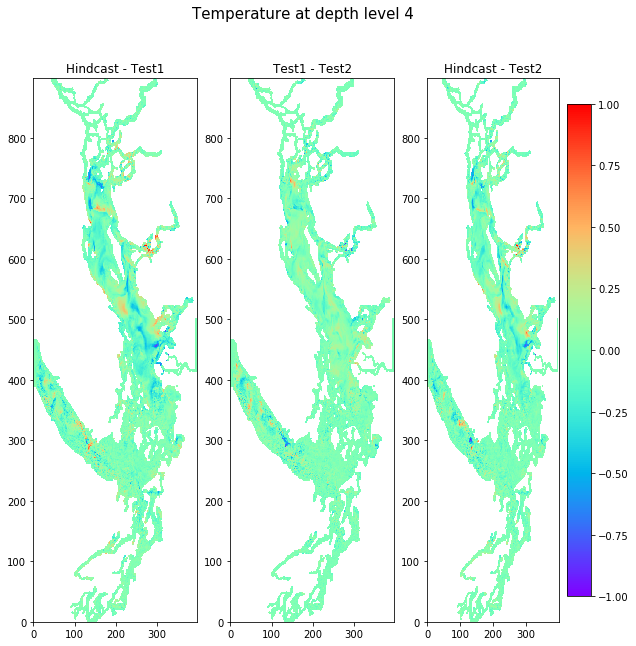

In [95]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(oct28hindcast.variables['votemper'][23,4,...]
                                        - oct28test1.variables['votemper'][23,4,...],
                                mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-1,vmax= 1, cmap = 'rainbow')
sal1 = ax[1].pcolormesh(ma.masked_array(oct28test1.variables['votemper'][23,4,...]
                                        -oct28test2.variables['votemper'][23,4,...],
                                mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-1,vmax= 1, cmap = 'rainbow'
                     )
sal2 = ax[2].pcolormesh(ma.masked_array(-oct28test2.variables['votemper'][23,4,...]
                                        +oct28hindcast.variables['votemper'][23,4,...],
                                       mask = 1-mesh_mask.variables['tmask'][0,4,...]),
                     vmin=-1,vmax= 1, cmap = 'rainbow'
                     )
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('Temperature at depth level 4', fontsize=15)

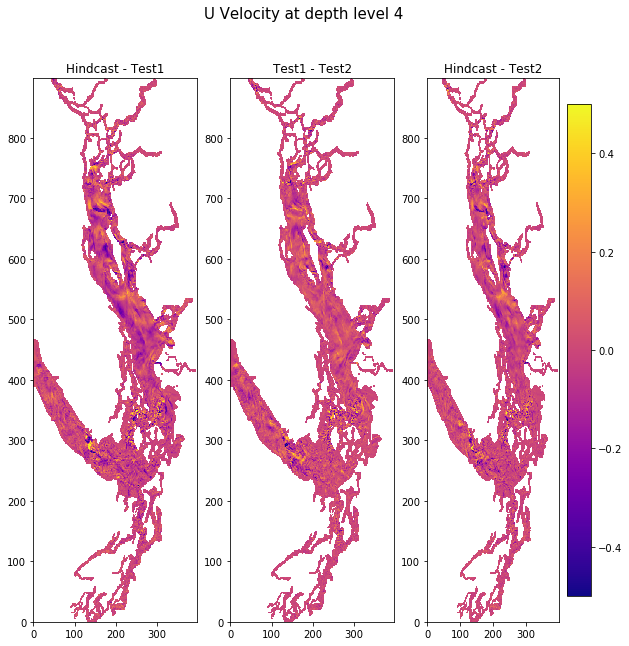

In [105]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(uhindcast.variables['vozocrtx'][23,4,...]
                                        - utest1.variables['vozocrtx'][23,4,...],
                                mask = 1-mesh_mask.variables['umask'][0,4,...]),
                     vmin=-0.5,vmax= 0.5, cmap = 'plasma'
                     )
sal1 = ax[1].pcolormesh(ma.masked_array(utest1.variables['vozocrtx'][23,4,...]
                                        -utest2.variables['vozocrtx'][23,4,...],
                                mask = 1-mesh_mask.variables['umask'][0,4,...]),
                     vmin=-0.5,vmax= 0.5, cmap='plasma'
                     )
sal2 = ax[2].pcolormesh(ma.masked_array(-utest2.variables['vozocrtx'][23,4,...]
                                        +uhindcast.variables['vozocrtx'][23,4,...],
                                       mask = 1-mesh_mask.variables['umask'][0,4,...]),
                     vmin=-0.5,vmax= 0.5, cmap='plasma'
                     )
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('U Velocity at depth level 4', fontsize=15)

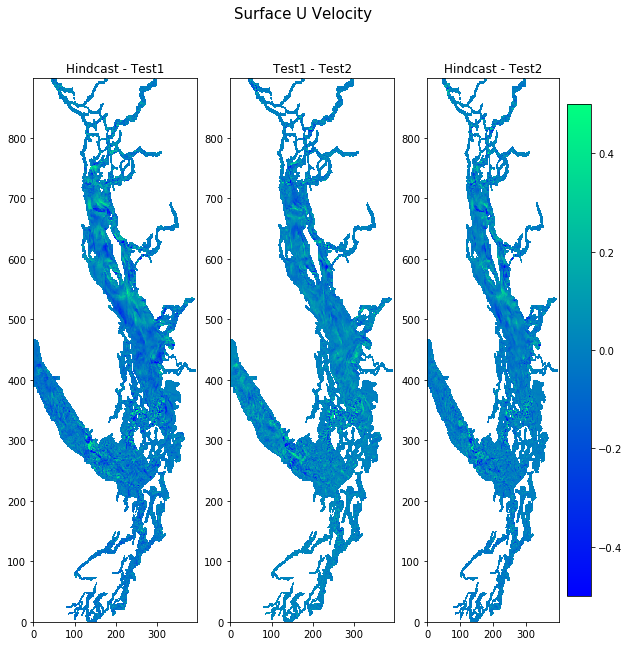

In [108]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
sal0 = ax[0].pcolormesh(ma.masked_array(uhindcast.variables['vozocrtx'][23,0,...]
                                        - utest1.variables['vozocrtx'][23,0,...],
                                mask = 1-mesh_mask.variables['umask'][0,0,...]),
                     vmin=-0.5, vmax=0.5, cmap = 'winter'
                     )
sal1 = ax[1].pcolormesh(ma.masked_array(utest1.variables['vozocrtx'][23,0,...]
                                        -utest2.variables['vozocrtx'][23,0,...],
                                mask = 1-mesh_mask.variables['umask'][0,0,...]),
                     vmin=-0.5,vmax= 0.5, cmap = 'winter'
                     )
sal2 = ax[2].pcolormesh(ma.masked_array(-utest2.variables['vozocrtx'][23,0,...]
                                        +uhindcast.variables['vozocrtx'][23,0,...],
                                       mask = 1-mesh_mask.variables['umask'][0,0,...]),
                     vmin=-0.5, vmax=0.5, cmap = 'winter'
                     )
fig.colorbar(sal2, ax=ax[2])
ax[0].set_title('Hindcast - Test1')
ax[1].set_title('Test1 - Test2')
ax[2].set_title('Hindcast - Test2')
fig.suptitle('Surface U Velocity', fontsize=15)

In [5]:
whindcast = nc.Dataset('/results/SalishSea/hindcast/28oct14/SalishSea_1h_20141028_20141028_grid_W.nc')
wtest1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/surface_wave_mixing/SalishSea_1h_20141019_20141028_grid_W_20141028-20141028.nc')
wtest2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/surface_mixing1/SalishSea_1h_20141019_20141028_grid_W_20141028-20141028.nc')

In [14]:
vhindcast = nc.Dataset('/results/SalishSea/hindcast/28oct14/SalishSea_1h_20141028_20141028_grid_V.nc')
vtest1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/myResults/surface_wave_mixing/SalishSea_1h_20141019_20141028_grid_V_20141028-20141028.nc')
vtest2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/surface_mixing1/SalishSea_1h_20141019_20141028_grid_V_20141028-20141028.nc')

1.1363636363636362

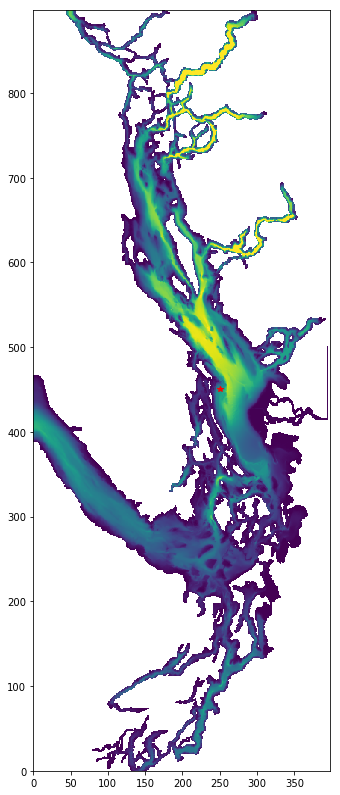

In [26]:
fig, ax = plt.subplots(figsize=(14,14))
ax.pcolormesh(bathy.variables['Bathymetry'][:])
ax.plot(250,450, 'r*')
viz_tools.set_aspect(ax)

In [32]:
depth = oct19hindcast.variables['deptht'][:]

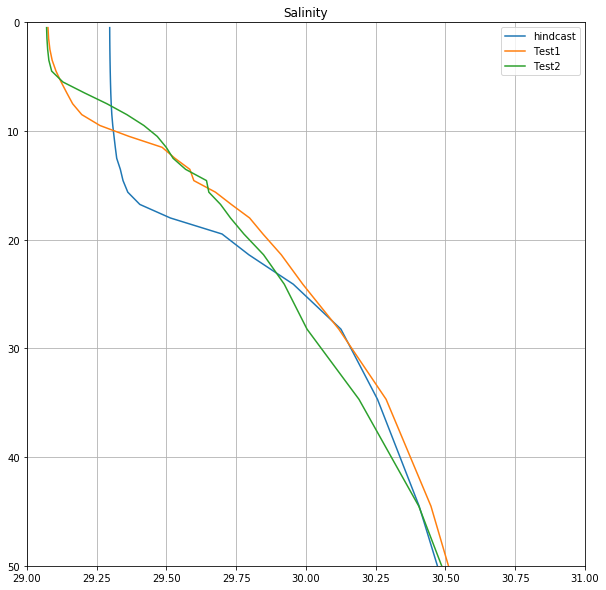

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( oct28hindcast.variables['vosaline'][23,:,450,250], depth, label='hindcast')
ax.plot(oct28test1.variables['vosaline'][23,:,450,250], depth, label = 'Test1')
ax.plot(oct28test2.variables['vosaline'][23, :, 450,250], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(50,0)
plt.xlim(29,31)
ax.set_title('Salinity')

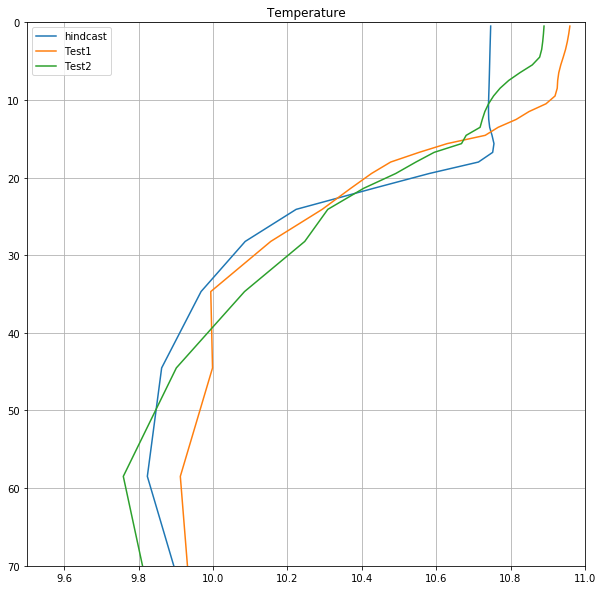

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( oct28hindcast.variables['votemper'][23,:,450,250], depth, label='hindcast')
ax.plot(oct28test1.variables['votemper'][23,:,450,250], depth, label = 'Test1')
ax.plot(oct28test2.variables['votemper'][23, :, 450,250], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(70,0)
plt.xlim(9.5,11)
ax.set_title('Temperature')

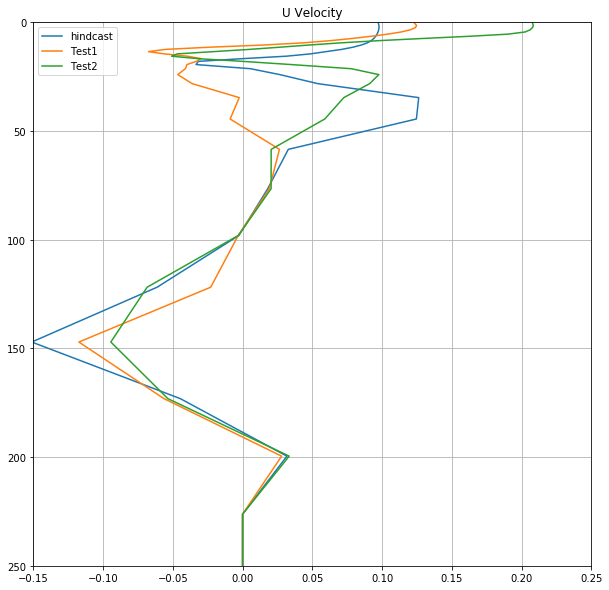

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( uhindcast.variables['vozocrtx'][23,:,450,250], depth, label='hindcast')
ax.plot(utest1.variables['vozocrtx'][23,:,450,250], depth, label = 'Test1')
ax.plot(utest2.variables['vozocrtx'][23, :, 450,250], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(250,0)
plt.xlim(-0.15,0.25)
ax.set_title('U Velocity')

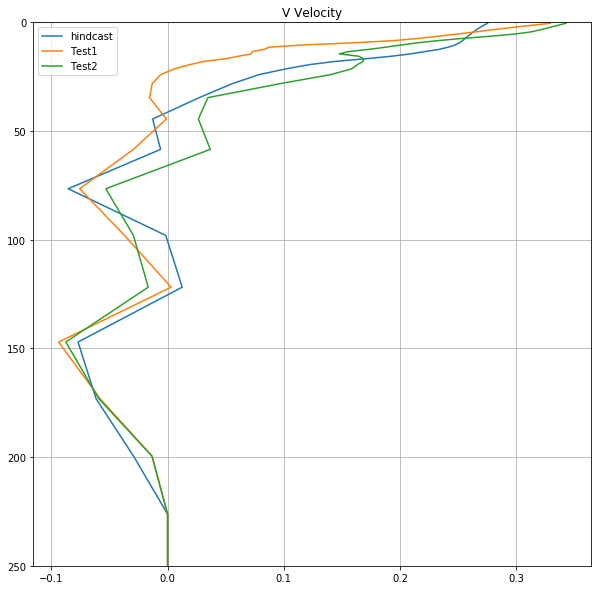

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( vhindcast.variables['vomecrty'][23,:,450,250], depth, label='hindcast')
ax.plot(vtest1.variables['vomecrty'][23,:,450,250], depth, label = 'Test1')
ax.plot(vtest2.variables['vomecrty'][23, :, 450,250], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(250,0)
ax.set_title('V Velocity')

1.1363636363636362

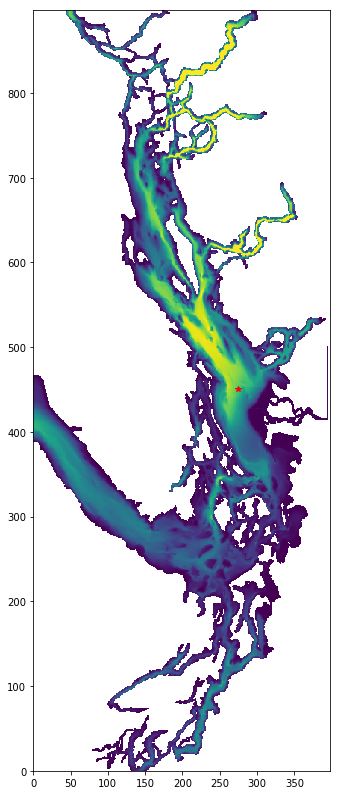

In [58]:
fig, ax = plt.subplots(figsize=(14,14))
ax.pcolormesh(bathy.variables['Bathymetry'][:])
ax.plot(275,450, 'r*')
viz_tools.set_aspect(ax)

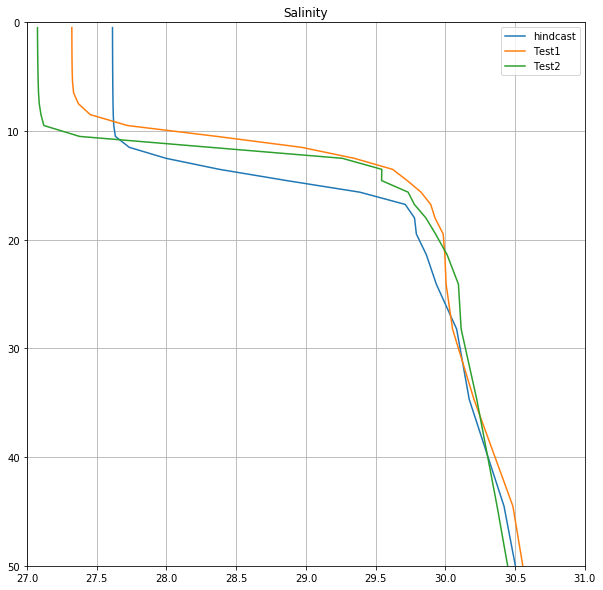

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( oct28hindcast.variables['vosaline'][23,:,450,275], depth, label='hindcast')
ax.plot(oct28test1.variables['vosaline'][23,:,450,275], depth, label = 'Test1')
ax.plot(oct28test2.variables['vosaline'][23, :, 450,275], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(50,0)
plt.xlim(27,31)
ax.set_title('Salinity')

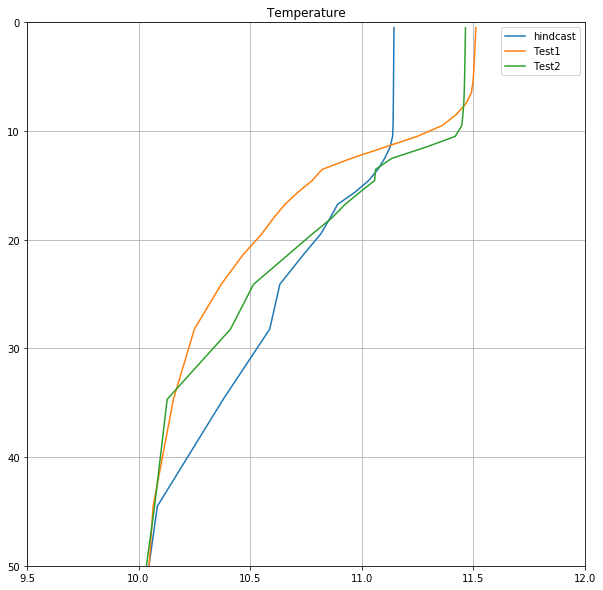

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( oct28hindcast.variables['votemper'][23,:,450,275], depth, label='hindcast')
ax.plot(oct28test1.variables['votemper'][23,:,450,275], depth, label = 'Test1')
ax.plot(oct28test2.variables['votemper'][23, :, 450,275], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(50,0)
plt.xlim(9.5,12)
ax.set_title('Temperature')

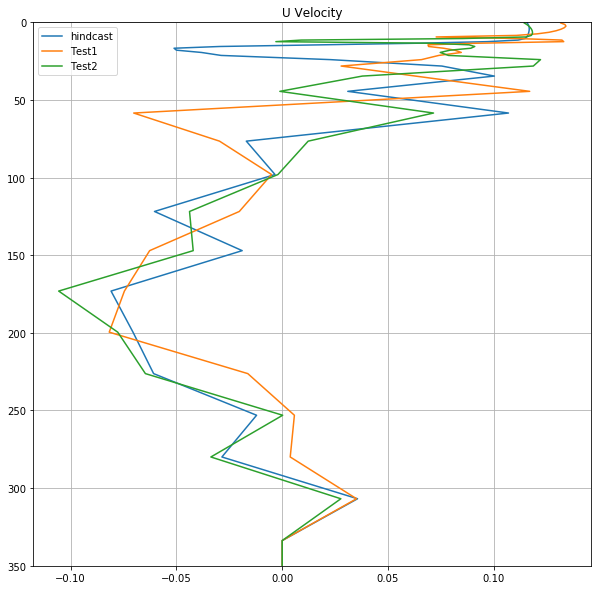

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( uhindcast.variables['vozocrtx'][23,:,450,275], depth, label='hindcast')
ax.plot(utest1.variables['vozocrtx'][23,:,450,275], depth, label = 'Test1')
ax.plot(utest2.variables['vozocrtx'][23, :, 450,275], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(350,0)
#plt.xlim(-0.1,0.25)
ax.set_title('U Velocity')

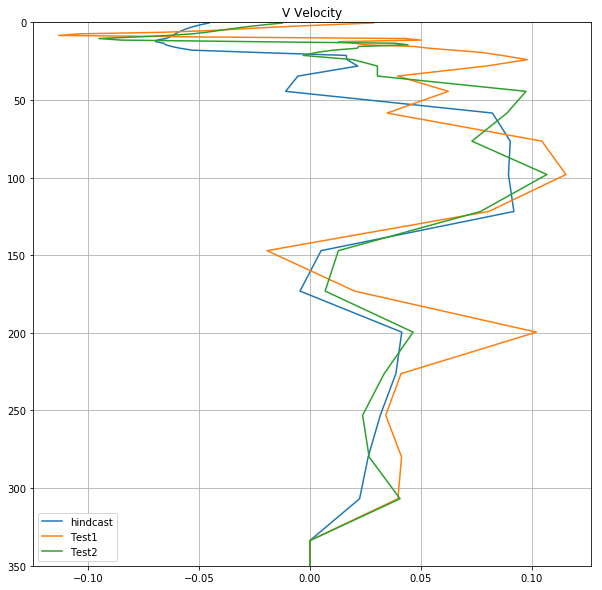

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( vhindcast.variables['vomecrty'][23,:,450,275], depth, label='hindcast')
ax.plot(vtest1.variables['vomecrty'][23,:,450,275], depth, label = 'Test1')
ax.plot(vtest2.variables['vomecrty'][23, :, 450,275], depth, label = 'Test2')
ax.grid('on')
ax.legend()
ax.set_ylim(350,0)
ax.set_title('V Velocity')